In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading Train Dataset

In [21]:
df=pd.read_csv(r"C:\Users\HP\Desktop\Machine Learnings\train.csv")

In [22]:
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


there are 159571 rows and 8 columns , In this malignant, highly_malignant,rude,threat, abuse and loathe are our target variables having binary class of Yes (1) & No (2). 

In [23]:
df.shape

(159571, 8)

Loading Test Dataset

In [26]:
dft=pd.read_csv(r"C:\Users\HP\Desktop\Machine Learnings\test.csv")

In [27]:
dft

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


In [29]:
dft.shape

(153164, 2)

# checking null values

In [30]:
df.isnull().sum().any()

False

In [31]:
df1.isnull().sum().any()

False

as we have checked both train and test datasets since there are no null values

Lets see how the comments look like

In [32]:
df['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

By observing these comments we can say that we need to do lot of text processing as there are many words which are not important for prediction, as well as numbers and other stuff.

Exploration of Target Variables

In [33]:
Categorical = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [34]:
for i in df.columns[2:]:
    print('value count of',i)
    print(df[i].value_counts())
    print('='*100)

value count of malignant
0    144277
1     15294
Name: malignant, dtype: int64
value count of highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64
value count of rude
0    151122
1      8449
Name: rude, dtype: int64
value count of threat
0    159093
1       478
Name: threat, dtype: int64
value count of abuse
0    151694
1      7877
Name: abuse, dtype: int64
value count of loathe
0    158166
1      1405
Name: loathe, dtype: int64


from the above observation, these all are imbalanced dataset so we need to handle them

# Exploratory Data Analysis (EDA)

<AxesSubplot:xlabel='malignant', ylabel='count'>

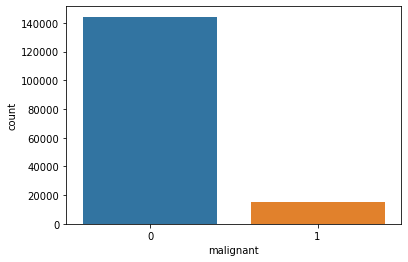

In [39]:
sns.countplot(df['malignant'])

<AxesSubplot:xlabel='highly_malignant', ylabel='count'>

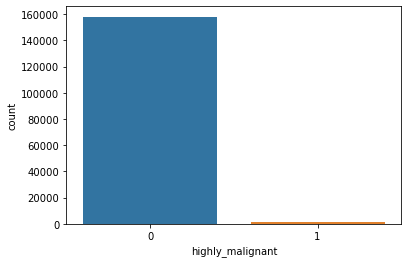

In [54]:
sns.countplot(df['highly_malignant'])

<AxesSubplot:xlabel='rude', ylabel='count'>

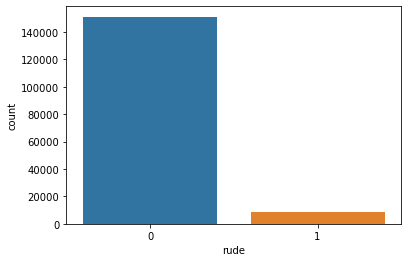

In [53]:
sns.countplot(df['rude'])

<AxesSubplot:xlabel='threat', ylabel='count'>

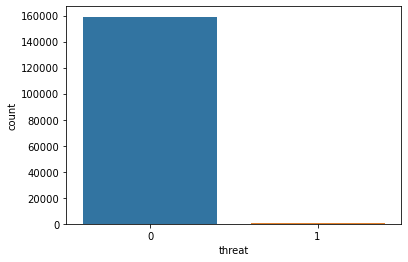

In [52]:
sns.countplot(df['threat'])

<AxesSubplot:xlabel='abuse', ylabel='count'>

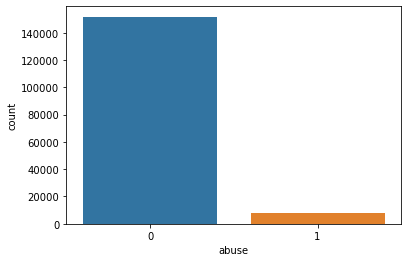

In [51]:
sns.countplot(df['abuse'])

<AxesSubplot:xlabel='loathe', ylabel='count'>

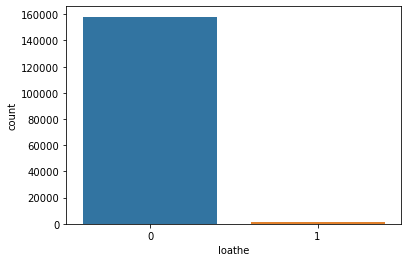

In [49]:
sns.countplot(df['loathe'])

From the above plot , maximum Negative comments categories belong to Malignant, a lot of comments are abusive and rude as well; while threat comments are the minimum.

In [55]:
#Checking the percentage of the comments
none = df[(df['malignant']!=1) & (df['highly_malignant']!=1) & (df['rude']!=1) & 
                            (df['threat']!=1) & (df['abuse']!=1) & (df['loathe']!=1)]
percent=len(none)/len(df)*100
print('Percentage of good/neutral comments = ',percent)
print('Percentage of negative comments = ', (100-percent))

Percentage of good/neutral comments =  89.83211235124176
Percentage of negative comments =  10.167887648758239


Around 90% comments are Good/Neutral in nature while rest 10% comments are Negative in nature.

In [58]:
#Create a new subset of the data by only taking the 2nd column onwards (comments and categories)
data_count = df.iloc[:,2:].sum()
data_count

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

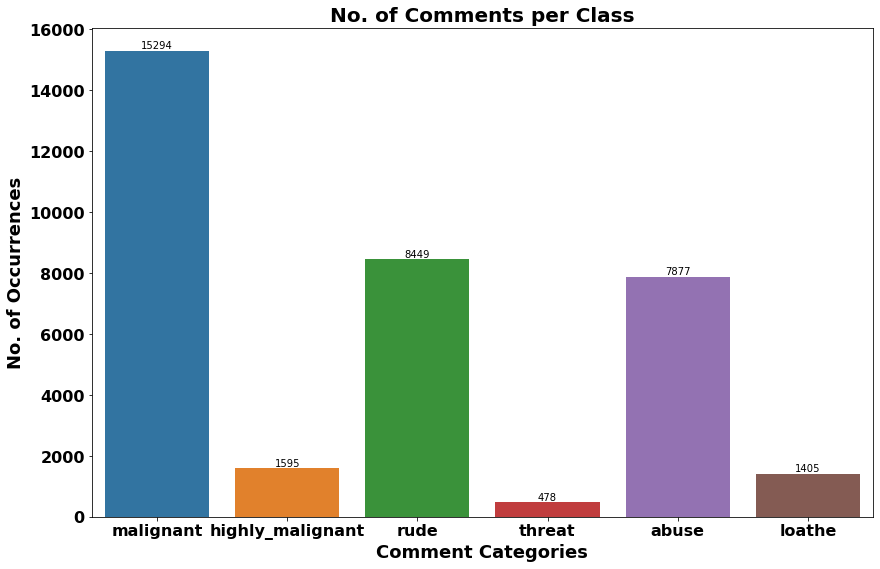

In [57]:
# Plot a chart with the following size
plt.figure(figsize=(14,9))

# Plot a bar chart using the index (category values) and the count of each category.
ax = sns.barplot(data_count.index, data_count.values)

plt.title("No. of Comments per Class", fontsize=20, fontweight='bold')
plt.ylabel('No. of Occurrences', fontsize=18,fontweight='bold')
plt.xlabel('Comment Categories', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
rects = ax.patches
labels = data_count.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.show()

Out of total Negative comments the maximum negative comments comes with Malignant in nature followed by rude categories.

Very few comments comes with threatening nataure.

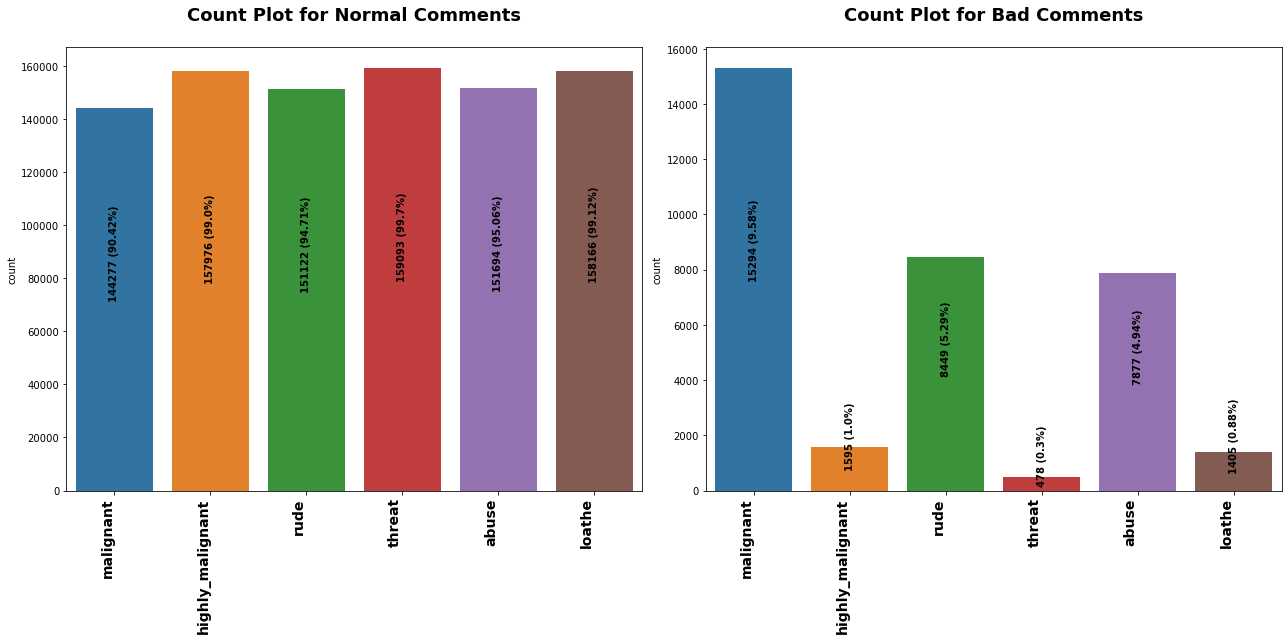

In [59]:
# comparing normal comments and bad comments using count plot

fig, ax = plt.subplots(1,2,figsize=(18,9))

for i in range(2):
    sns.countplot(data=df[df.columns[2:]][df[df.columns[2:]]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n", fontsize=18, fontweight='bold')
    else:
        ax[i].set_title("Count Plot for Bad Comments\n", fontsize=18, fontweight='bold')
        
    ax[i].set_xticklabels(df.columns[2:], rotation=90, ha="right", fontsize=14, fontweight='bold')
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1
plt.tight_layout()
plt.show()

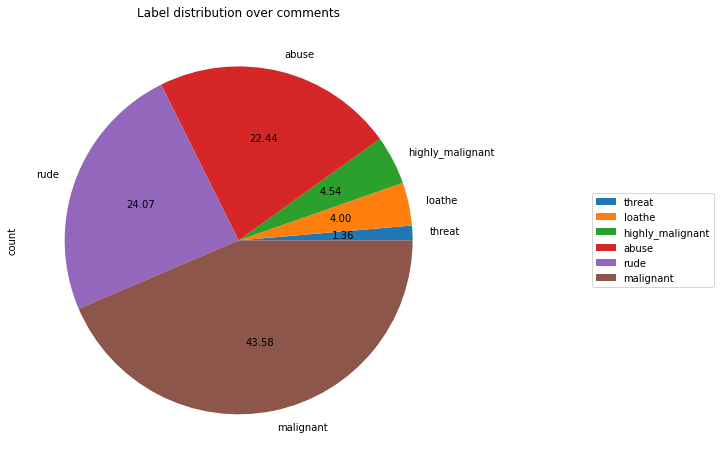

In [60]:
#Visualizing the label distribution of comments using pie chart
comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df[df.columns[2:]].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments',
                         autopct='%2.2f', figsize = (8,8))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))
plt.show()

Observation :
    
Around 90% comments are Good/Neutral in nature while rest 10% comments are Negative in nature.

Out of total negative comments around 43.58% are malignant in nature followed by 24.07% are rude comments.

In [61]:
comment_len = df.comment_text.str.len()
df.comment_text.str.len().median()

205.0

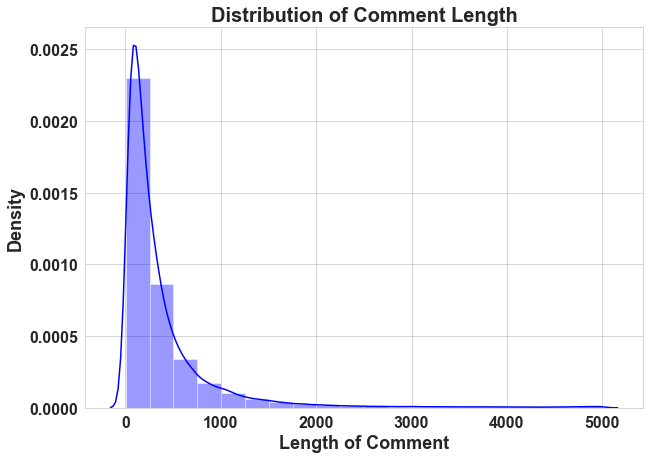

In [62]:
#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = df.comment_text.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()

*Above is a plot showing the comment length frequency. As noticed, most of the comments are short with only a few comments longer than 1000 words. Majority of the comments are of length 500, where maximum length is 5000 and minimum length is 5. Median length being 250.*

In [63]:
#Checking correlation of the dataset
corr=df.corr()  
corr

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


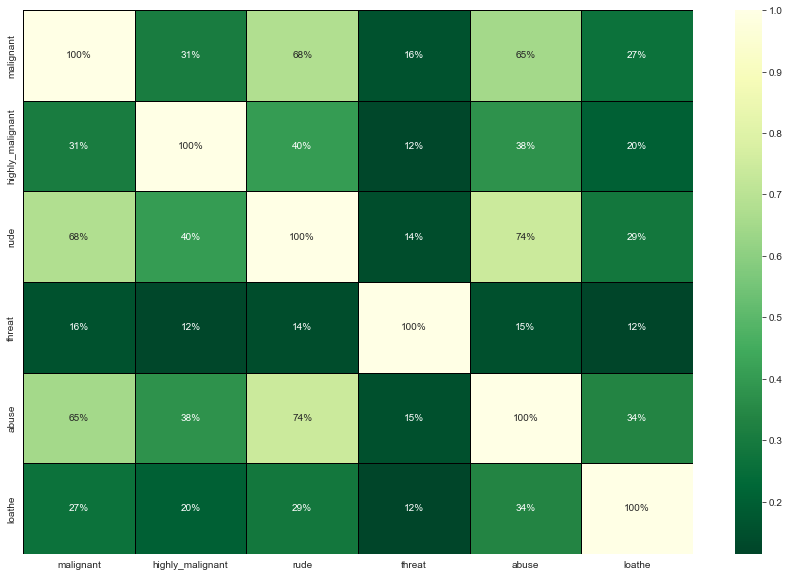

In [64]:
# Plotting heatmap for visualizing the correlation
plt.figure(figsize=(15, 10))
corr = df.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='YlGn_r', annot=True)
plt.show()

The highest positive correlation is seen in between fields 'rude' and 'abuse'.

Attribute 'threat' is negatively correlated with each and every other feature of this training dataset.

Almost all variable are correlated with each other negatively.*

Data pre-processing

In [65]:
#As ID is not much important, we can drop from the dataset
df.drop('id',axis=1,inplace=True)
dft.drop('id',axis=1,inplace=True)

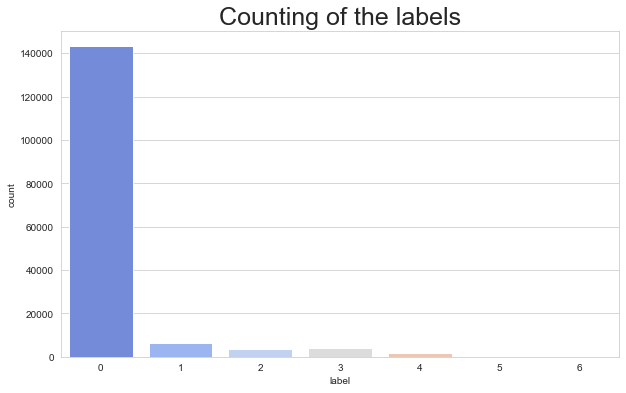

In [66]:
#Checking the count of labels
df['label']=df[comments_labels].sum(axis=1)
plt.figure(figsize=(10,6))
sns.countplot(df['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

Feature Extraction for length before cleaning in training dataset.

In [67]:
# Creating a column 'length_before_cleaning' in training dataset
# It represents the length of the each comment respectively in a column 'comment_text' 
df['length_before_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,0,295
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,0,99
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,0,81
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0,0,116


Feature Extraction for length before cleaning in testing dataset.

In [68]:
# Creating a column 'length_before_cleaning' in test dataset
# It represents the length of the each comment respectively in a column 'comment_text' 
dft['length_before_cleaning'] = dft['comment_text'].map(lambda comment_text: len(comment_text))
dft.head(5)

,comment_text,length_before_cleaning
0,Yo bitch Ja Rule is more succesful then you'll...,367
1,== From RfC == \n\n The title is fine as it is...,50
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54
3,":If you have a look back at the source, the in...",205
4,I don't anonymously edit articles at all.,41


# Text Mining
Operation perform are as followed:

Removing Punctuations and other special characters

Word Tokenzation

Removing Stop Words

Stemming and Lemmatising

Applying Count Vectoriser

In [114]:
#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [115]:
#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()

In [116]:
#Replacing '\n' in comment_text
df['comment_text'] = df['comment_text'].replace('\n',' ')

In [144]:

#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)


In [145]:
spec_chars = ["!",'"',"#","%","&","'","(",")",
              "*","+",",","-",".","/",":",";","<",
              "=",">","?","@","[","\\","]","^","_",
              "`","{","|","}","~","–",]
for char in spec_chars:
    df['comment_text'] = df['comment_text'].str.replace(char, ' ')

In [146]:
# Creating a column 'len_after_cleaning'
# Representing the length of the each comment respectively in a column 'comment_text' after cleaning the text.
df['length_after_cleaning'] = df['comment_text'].map(lambda comment_text: len(comment_text))
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,length_before_cleaning,length_after_cleaning
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,264
1,D aww He matches this background colour I m s...,0,0,0,0,0,0,0,112,112
2,Hey man I m really not trying to edit war It...,0,0,0,0,0,0,0,233,233
3,\nMore\nI can t make any real suggestions on ...,0,0,0,0,0,0,0,622,622
4,You sir are my hero Any chance you remember...,0,0,0,0,0,0,0,67,67


In [143]:
# Checking Total length removal in train dataset
print("Original Length:", df.length_before_cleaning.sum())
print("Cleaned Length:", df.length_after_cleaning.sum())
print("Total Words Removed:", (df.length_before_cleaning.sum()) - (df.length_after_cleaning.sum()))

Original Length: 62893130
Cleaned Length: 62893130
Total Words Removed: 0


Word Cloud for WORDS TAGGED AS MALIGNANT

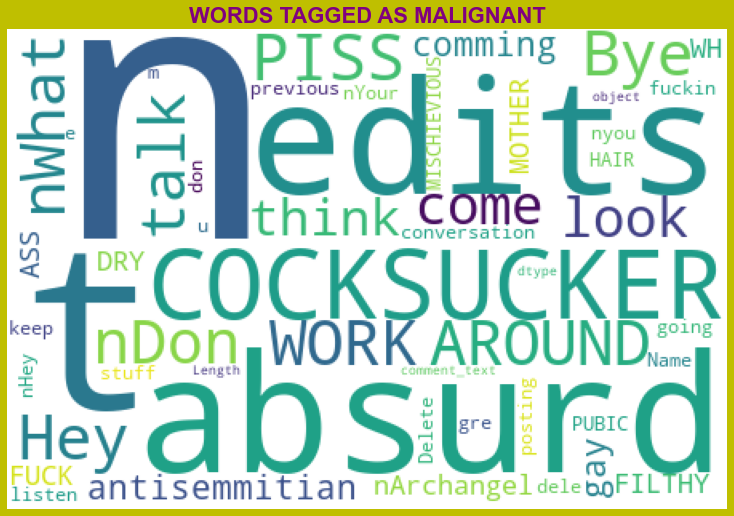

In [147]:
# Plotting for malignant
df_malignant=df[(df['malignant']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_malignant['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS MALIGNANT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of Highly malignant comments, it is clear that it mostly consists of words like fuck, stupid, fucking, bitch, crow, shit, cocksucker etc.*

Word Cloud for WORDS TAGGED AS RUDE

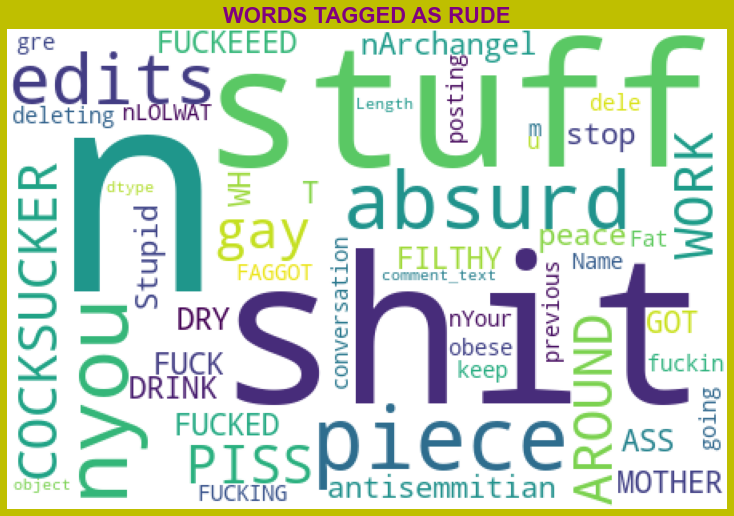

In [148]:
# Plotting for rude
df_rude=df[(df['rude']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_rude['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS RUDE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of Rude comments, it is clear that it mostly consists of words like fucking, shit, white, piece, edits, stuff, absurd etc.*

Word Cloud for WORDS TAGGED AS THREAT


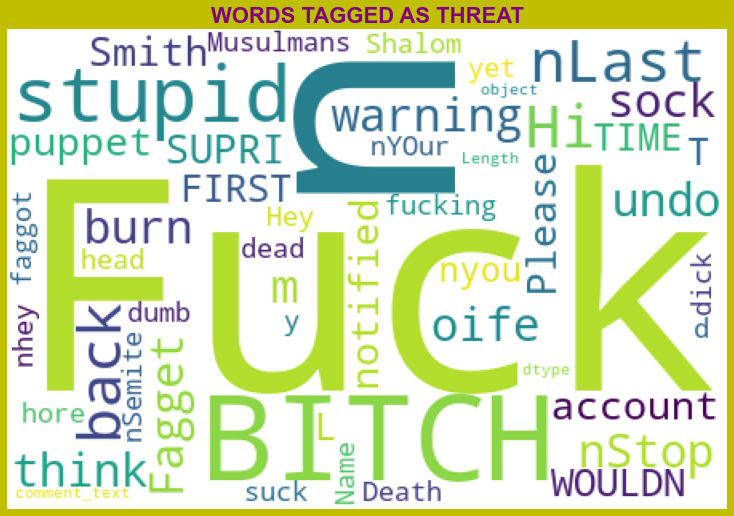

In [149]:
# Plotting for threat
df_threat=df[(df['threat']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_threat['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS THREAT',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of Threat comments, it is clear that it mostly consists of words like fuck,suck, Bitch, die, stupid, etc.*

Word Cloud for WORDS TAGGED AS ABUSE

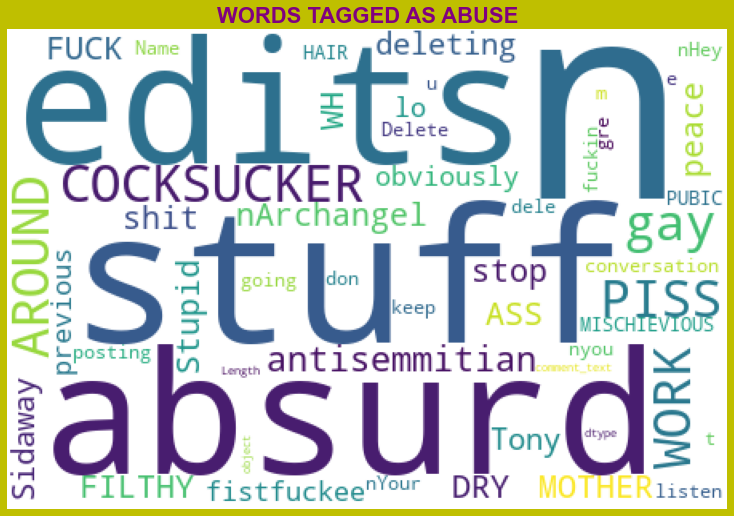

In [150]:
# Plotting for abuse
df_abuse=df[(df['abuse']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_abuse['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS ABUSE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

From wordcloud of Abuse comments, it is clear that it mostly consists of words like edits, white, shit, stuff, fuck, piss, fucking etc.*

Word Cloud for WORDS TAGGED AS LOATHE

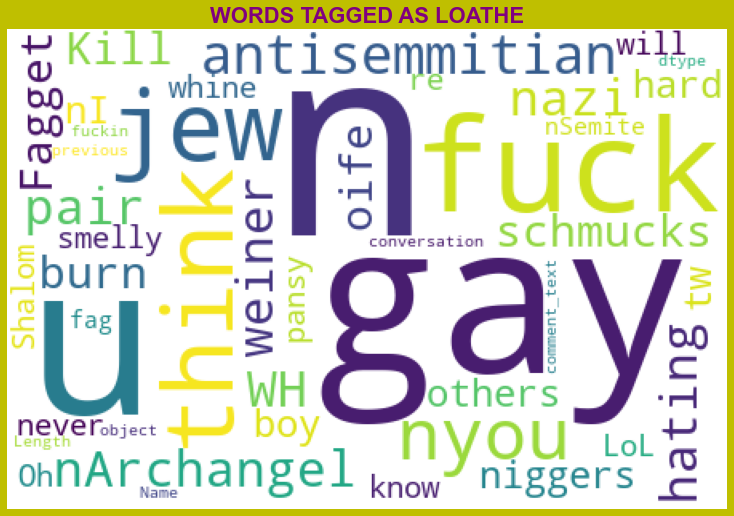

In [151]:
# Plotting for loathe
df_loathe=df[(df['loathe']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_loathe['comment_text']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS TAGGED AS LOATHE',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()

*From wordcloud of Loathe comments, it is clear that it mostly consists of words like fuck,gay, kill, think, jew, u etc

# Separating independent and dependent variables

1. Vectorizer & Spliting Train dataset

In [152]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english')

In [153]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(df['comment_text']).toarray()

In [154]:
output_labels= df.columns[1:7]

In [155]:
# output variables
from scipy.sparse import csr_matrix
Y = csr_matrix(df[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", X.shape)
print("Output Variable Shape:", Y.shape)

Input Variable Shape: (159571, 2000)
Output Variable Shape: (159571, 6)


In [181]:
X.shape

(159571, 2000)

In [192]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [183]:
Y.shape

(159571, 6)

In [193]:
Y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

# 2. Vectorizer & Spliting test dataset

In [156]:
# Doing the above process for test data 
test_vec = tf_vec.fit_transform(dft['comment_text'])
test_vec

<153164x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 2200643 stored elements in Compressed Sparse Row format>

In [157]:
test_vec.shape

(153164, 2000)

Machine Learning Model Building

In [159]:
#Importing Machine learning Model library
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [206]:
import timeit, sys
import tqdm.notebook as tqdm

In [215]:
# 3. Training and Testing Model on our train dataset

# Creating a function to train and test model
def build_models(models,x,y,test_size=0.33,random_state=42):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
        
        sys.stdout.write("\n=======================================================================================\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

                      

In [218]:
half = len(df)//4

In [220]:
half

39892

In [223]:
# Preparing the list of models for classification purpose
models = {
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Ada Boost Classifier": {"name": AdaBoostClassifier()},
         }

In [234]:
# Taking one forth of the total data for training and testing purpose
half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/4 [00:00<?, ?it/s]


Current Model in Progress: Logistic Regression 
Training:  BinaryRelevance(classifier=LogisticRegression(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.02268641600202557
	Accuracy Score: 0.9112799088492214
              precision    recall  f1-score   support

           0       0.92      0.49      0.64      1281
           1       0.59      0.17      0.27       150
           2       0.95      0.52      0.68       724
           3       0.00      0.00      0.00        44
           4       0.81      0.42      0.56       650
           5       0.89      0.07      0.14       109

   micro avg       0.89      0.45      0.60      2958
   macro avg       0.69      0.28      0.38      2958
weighted avg       0.87      0.45      0.59      2958
 samples avg       0.05      0.04      0.04      2958
Completed in [17.431644500000402 sec.]

Current Model in Progress: Random Forest Classifier 
Training:  BinaryRelevance(classifier=RandomForestClassifier(), require_dense=[True, True]

From the above model comparision it is clear that Linear Support Vector Classifier performs better with Accuracy Score: 91.15077857956704 % and Hamming Loss: 2.0952019242942144 % than the other classification models.

*Therefore I am now going to use Linear Support Vector Classifier for further Hyperparameter tuning process.*

# Hyperparameter Tuning

In [235]:
from sklearn.model_selection import  GridSearchCV


In [236]:
fmod_param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111] }
#SVC = BinaryRelevance(classifier=LinearSVC(),require_dense=[True,True])           
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, fmod_param, cv=3,verbose = 10)
x_train,x_test,y_train,y_test = train_test_split(X[:half,:], Y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV 1/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 1/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.4s
[CV 2/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 2/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.2s
[CV 3/3; 1/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42
[CV 3/3; 1/24] END estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=42;, score=nan total time=   0.2s
[CV 1/3; 2/24] START estimator__loss=hinge, estimator__multi_class=ovr, estimator__penalty=l1, estimator__random_state=7

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

# Final Model

In [237]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', 
            multi_class='ovr', penalty='l2', random_state=42))

Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
h_loss = hamming_loss(y_test,fmod_pred)*100
print("Hamming loss for the Best Model is:", h_loss)

Accuracy score for the Best Model is: 91.20153743315508
Hamming loss for the Best Model is: 2.104222370766488


Final Model is giving us Accuracy score of 91.26% which is slightly improved compare to earlier Accuracy score of 91.15%.



# Confusion Matrix of Final Model

In [243]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
print("Confusion matrix:\n\n", multilabel_confusion_matrix(y_test, fmod_pred))



Confusion matrix:

 [[[10720    73]
  [  524   651]]

 [[11833     0]
  [  135     0]]

 [[11272    38]
  [  222   436]]

 [[11930     0]
  [   38     0]]

 [[11268   104]
  [  287   309]]

 [[11871     1]
  [   89     7]]]


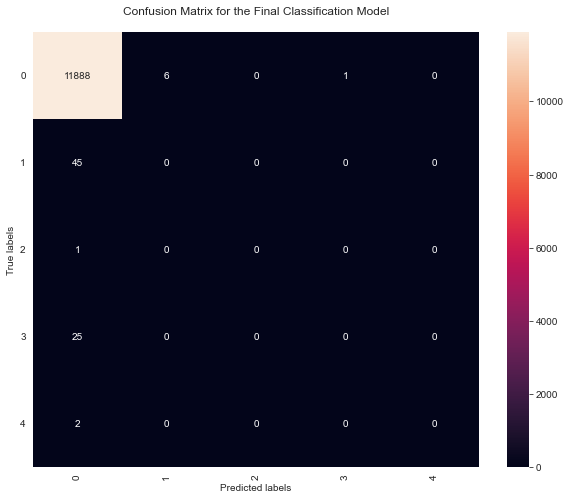

In [248]:
plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(fmod_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()

# Model Saving or Serialization

In [249]:
# selecting the best model
best_model = trained_models['Support Vector Classifier']['trained']

# saving the best classification model
import joblib
joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

Test Dataset Predictions

In [250]:
# saving the best classification model
import joblib
best_model = joblib.load('Malignant_comments_classifier.pkl')
#joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

In [251]:
test_vec.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [252]:
# Make predictions and view the results
predict_test = best_model.predict(test_vec.toarray())

# Saving predicted values into a CSV file
pd.DataFrame(predict_test).to_csv('Predicted_test_output.csv')

In [264]:
df1 = pd.read_csv('Predicted_test_output.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)
df2=dft.copy()
df = pd.concat([df2, df1], axis=1)
df

,comment_text,length_before_cleaning,malignant
0,Yo bitch Ja Rule is more succesful then you'll...,367,NaN
1,== From RfC == \n\n The title is fine as it is...,50,NaN
2,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",54,NaN
3,":If you have a look back at the source, the in...",205,NaN
4,I don't anonymously edit articles at all.,41,NaN
...,...,...,...
153159,". \n i totally agree, this stuff is nothing bu...",60,NaN
153160,== Throw from out field to home plate. == \n\n...,198,NaN
153161,""" \n\n == Okinotorishima categories == \n\n I ...",423,NaN
153162,""" \n\n == """"One of the founding nations of the...",502,NaN


In [267]:
df.to_csv('test_dataset_predictions2.csv', index=False)


Finally, we had predicted over the test data and the predictions obtained were saved in a csv file.